# Train a linear regression model using PyTorch

### First, how to use min-batch with Adam optimizer for model training

### Second, how to use stochastic gradient descent with momentum for model training

#### Generate the dataset: 1-dimensional feature vector and 10,000 training samples 

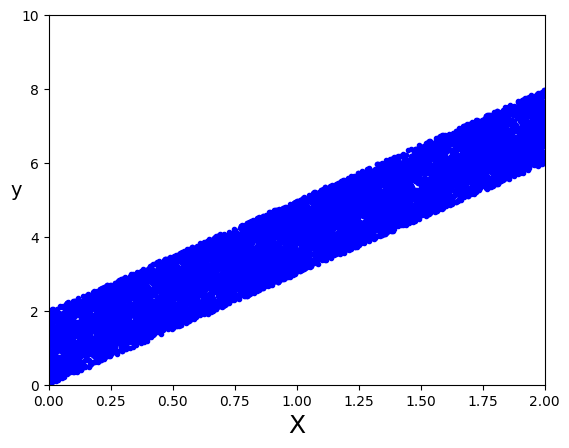

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(10000, 1) #X are 100 inputs with 1-dimensional feature randomly distributed in [0, 2)
y = 3 * X + np.random.uniform(0, 2, (10000, 1)) #y are true label values

plt.plot(X, y, 'b.')
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 10])
plt.show()

#### Convert the dataset into Tensor used by PyTorch

In [2]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

class ConvertDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform
    
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        feature = self.X[idx]
        label = self.y[idx]
        sample = {'feature': feature, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

class ToTensor(object):
    def __call__(self, sample):
        feature, label = sample['feature'], sample['label'] 
        label = np.array(label)
        return {'feature': torch.from_numpy(feature).float(),
                'label': torch.from_numpy(label).float()}
    
#Convert training data
train_dataset = ConvertDataset(X,
                               y,
                               transform=transforms.Compose([
                                   ToTensor()
                               ]))

#Load the converted training data into DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)

#### Use PyTorch to build a linear regression model

In [3]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(1, 1) #The first "1" specifies that the feature dimension is 1, and the second "1" specifies that the final output is a scalar

    def forward(self, x):
        y = self.fc(x) #The output is a real number
        return y

#### Set up some hyperparameters: use mean squared loss, mini-batch with Adam optimizer, and epochs

In [4]:
epochs = 10
learning_rate = 0.01
lossfunction = nn.MSELoss() #Mean squared loss

model = LinearRegression()
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #Using Adam optimizer

print(model)

LinearRegression(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)


#### Train the model

In [5]:
#Define the training function
def train(epoch, model, train_dataloader, optimizer):
    model.train()
    
    train_loss = 0.0
    
    for i, data in enumerate(train_dataloader):
        X, y = data['feature'], data['label'] 

        optimizer.zero_grad()

        predictions = model(X)

        loss = lossfunction(predictions, y)
        loss.backward()
        optimizer.step()
        
        #print statistics
        train_loss += loss.item()

    print("epoch (%d): Train loss: %.3f" % (epoch, train_loss/10000))
    
    
#Train the model
for epoch in range(1, epochs + 1):
    train(epoch, model, train_dataloader, optimizer)

epoch (1): Train loss: 0.132
epoch (2): Train loss: 0.018
epoch (3): Train loss: 0.006
epoch (4): Train loss: 0.005
epoch (5): Train loss: 0.005
epoch (6): Train loss: 0.005
epoch (7): Train loss: 0.005
epoch (8): Train loss: 0.005
epoch (9): Train loss: 0.005
epoch (10): Train loss: 0.005


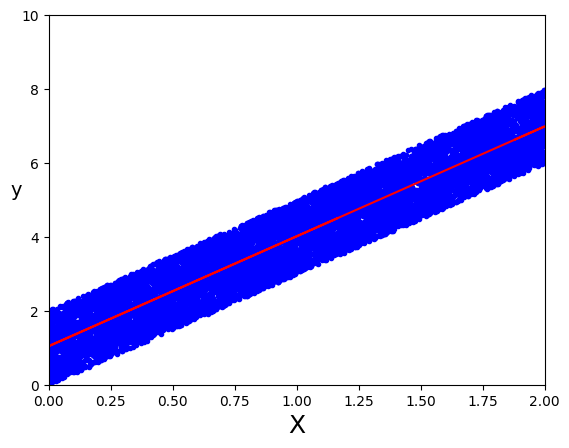

In [6]:
model.eval()

y_predict = model(torch.FloatTensor(X)).detach().numpy()
plt.plot(X, y, "b.")
plt.plot(X, y_predict, "r-")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 10])
plt.show()

## The learned linear regression model is much better than the ones we trained in "Code 2024-09-11-W-Gradient Descent Variants.ipynb" and "Code 2024-09-11-W-Training Linear Regression using Scikit-Learn.ipynb"

========================================================================================

========================================================================================

#### Set up some hyperparameters: use mean squared loss, stochastic gradient descent with momentum, and epochs

In [7]:
epochs = 10
learning_rate = 0.01
lossfunction = nn.MSELoss() #Mean squared loss

model = LinearRegression()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) #Using stochastic gradient descent with momentum

print(model)

LinearRegression(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)


#### Train the model

In [8]:
#Train the model
for epoch in range(1, epochs + 1):
    train(epoch, model, train_dataloader, optimizer)

epoch (1): Train loss: 0.015
epoch (2): Train loss: 0.005
epoch (3): Train loss: 0.005
epoch (4): Train loss: 0.005
epoch (5): Train loss: 0.005
epoch (6): Train loss: 0.005
epoch (7): Train loss: 0.005
epoch (8): Train loss: 0.005
epoch (9): Train loss: 0.005
epoch (10): Train loss: 0.005


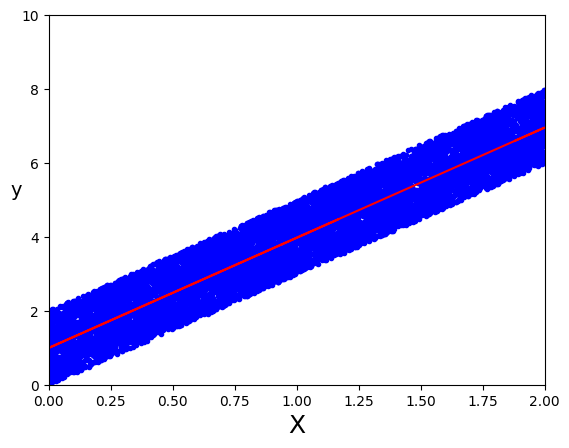

In [9]:
model.eval()

y_predict = model(torch.FloatTensor(X)).detach().numpy()
plt.plot(X, y, "b.")
plt.plot(X, y_predict, "r-")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 10])
plt.show()